In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
import numpy as np
import pandas as pd
import cvxpy as cp
import matplotlib.pyplot as plt

In [ ]:
home3_meter_2014  = pd.read_csv('/gdrive/MyDrive/Smart Energy/Electricity demand prediction/data/Home3/Home3-meter1_2014.csv')
home3_meter_2015  = pd.read_csv('/gdrive/MyDrive/Smart Energy/Electricity demand prediction/data/Home3/Home3-meter1_2015.csv')
home3_meter_2016  = pd.read_csv('/gdrive/MyDrive/Smart Energy/Electricity demand prediction/data/Home3/Home3-meter1_2016.csv')


In [ ]:
home3_meter=pd.concat([home3_meter_2014,home3_meter_2015,home3_meter_2016], axis=0)
home3_meter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282640 entries, 0 to 247599
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Date & Time                      282640 non-null  object 
 1   use [kW]                         282640 non-null  float64
 2   gen [kW]                         282640 non-null  float64
 3   Grid [kW]                        282640 non-null  float64
 4   AC [kW]                          282640 non-null  float64
 5   Furnace [kW]                     282640 non-null  float64
 6   Cellar Lights [kW]               282640 non-null  float64
 7   Washer [kW]                      282640 non-null  float64
 8   First Floor lights [kW]          282640 non-null  float64
 9   Utility Rm + Basement Bath [kW]  282640 non-null  float64
 10  Garage outlets [kW]              282640 non-null  float64
 11  MBed + KBed outlets [kW]         282640 non-null  float64
 12  Dr

In [ ]:
home3_meter

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,2014-01-01 00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
3,2014-01-01 01:30:00,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472
4,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247595,2016-12-31 23:55:00,0.406400,0.0,0.406400,0.000267,0.008950,0.005900,0.003450,0.051567,0.003333,0.004950,0.090567,0.000200,0.000433,0.003800,0.045867,0.004900,0.127633
247596,2016-12-31 23:56:00,0.405350,0.0,0.405350,0.000267,0.008950,0.005883,0.003433,0.051533,0.003350,0.004967,0.090017,0.000200,0.000433,0.003783,0.045967,0.004900,0.127083
247597,2016-12-31 23:57:00,0.404333,0.0,0.404333,0.000267,0.008900,0.005900,0.003433,0.051517,0.003350,0.004967,0.089817,0.000200,0.000450,0.003783,0.045933,0.004917,0.126417
247598,2016-12-31 23:58:00,0.403883,0.0,0.403883,0.000267,0.008900,0.005900,0.003450,0.051517,0.003350,0.004967,0.089850,0.000200,0.000433,0.003800,0.046017,0.004900,0.125833


In [ ]:

home3_meter['Date & Time'] = pd.to_datetime(home3_meter['Date & Time'])
home3_meter = home3_meter.resample('30T', on='Date & Time').sum()


In [ ]:
home3_meter=home3_meter.reset_index()
home3 = home3_meter[np.logical_and(home3_meter['Date & Time'] >= '2016-12-01', home3_meter['Date & Time'] < '2016-12-15')]
home3 = home3.drop_duplicates(subset = 'Date & Time', keep = 'first')
home3 = home3['use [kW]']
home3

16032    0.540815
16033    0.549824
16034    0.474269
16035    0.498591
16036    0.412019
           ...   
16699    0.660155
16700    0.391376
16701    0.532069
16702    0.433086
16703    0.515422
Name: use [kW], Length: 672, dtype: float64

In [4]:
# optimal values and decision values for objective function for each algorithm
optimal_Values= {}
decisions = {}

In [ ]:
def OfflineStaticOptimization(p, a, y):
  x = cp.Variable()
  f = 0

  for t in range(len(y)):
    f += p * x + a * cp.maximum(0, y[t] - x)
  
  prob = cp.Problem(cp.Minimize(f))

  prob.solve()

  return prob.value, x.value

In [ ]:
p = 0.4 / 2
a = 4 / 2
b = 4 / 2

In [ ]:
OfflineStaticOptimization(p, a, home3.tolist())

(189.67951909418298, array(0.93757))

In [ ]:
def OfflineDynamicOptimization(p, a, b, y):
  x = cp.Variable(len(y))
  
  f = p * x[0] + (a * cp.maximum(0, y[0] - x[0]))

  for t in range(1, len(y)):
    f += (p * x[t]) + (a * cp.maximum(0, y[t] - x[t])) + (b * cp.abs(x[t] - x[t - 1]))
  
  prob = cp.Problem(cp.Minimize(f))

  prob.solve()

  return prob.value, x.value

In [ ]:
OfflineDynamicOptimization(p, a, b, home3.tolist())

(157.19914617325952,
 array([0.54982444, 0.54982444, 0.54982444, 0.54982444, 0.54982444,
        0.54982444, 0.54982444, 0.54982444, 0.54982444, 0.54982444,
        0.54982444, 0.54982445, 0.79686889, 0.79686889, 0.79686889,
        0.79686889, 0.79686889, 0.79686889, 0.79686889, 0.79686889,
        0.79686889, 0.79686889, 0.79686889, 0.79686889, 0.79686889,
        0.79686889, 0.79686889, 0.79686889, 0.79686889, 0.79686889,
        0.79686889, 0.79686889, 0.79686889, 0.79686889, 0.79686889,
        0.82519556, 0.82519556, 0.85675722, 0.96238278, 0.96238278,
        0.96238278, 0.96238278, 0.96238278, 0.96238278, 0.96238278,
        0.90166352, 0.90166352, 0.90166352, 0.90166351, 0.90166351,
        0.90166351, 0.90166351, 0.90166351, 0.90166351, 0.90166351,
        0.90166351, 0.90166351, 0.90166351, 0.90166351, 0.90166351,
        0.90166351, 0.90166351, 0.90166352, 0.90166352, 0.90166352,
        0.90166352, 0.90166352, 0.90166352, 0.90166352, 0.90166352,
        0.90166352, 0.90166

 **Online Gradient Descent Algorithm**

In [ ]:
def calculate_gradient(x, y, t, p, a, b):
    
    gradient_first_term = p
    gradient_second_term = -a if y[t] > x[t] else 0
    gradient_third_term = b if x[t] > x[t - 1] else -b
    
    gradient = gradient_first_term + gradient_second_term + gradient_third_term
    
    return gradient

In [ ]:
def onlineGradientDescent_algo(y, learning_rate):
    n = len(y)
    x = [0.0] * (n + 1)
    x[1] = 0
    p = 0.4/2
    a = 4/2
    b = 4/2
    for t in range(1, n):
        gradient = calculate_gradient(x, y, t, p, a, b)
        x[t + 1] = x[t] - learning_rate * gradient
    return x

In [ ]:
x = onlineGradientDescent_algo(home3.tolist(), learning_rate = 0.02)

In [ ]:
def cost(x, y):
    cost = 0.0
    p = 0.4/2
    a = 4/2
    b = 4/2
    for t in range(1, len(y)):      
        cost += p * x[t] + a * max(0, y[t] - x[t] )+ b * abs(x[t] - x[t - 1])
    return cost


In [ ]:
ogd_cost=cost(x, home3.tolist())
print("\nThe objective value for Online Gradient Descent for Home1 is", ogd_cost)


The objective value for Online Gradient Descent for Home1 is 250.66622779000005


In [ ]:
costs = []
learning_rates = []
lr = 0
for i in range(10000):
    lr += 0.00001
    x = onlineGradientDescent_algo(home3.tolist(), learning_rate = lr)
    learning_rates.append(lr)
    costs.append(cost(x ,home3.tolist()))

Text(0.5, 0, 'Learning rate')

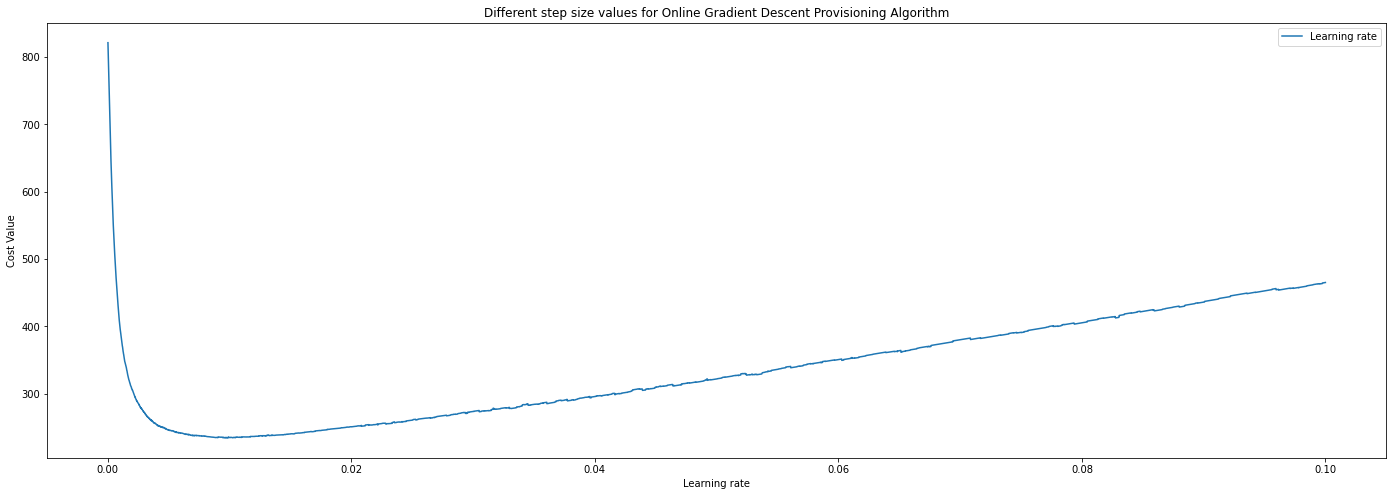

In [ ]:
fig = plt.figure(figsize=(24, 8))
plt.title("Different step size values for Online Gradient Descent Provisioning Algorithm")
plt.plot(learning_rates, costs, label = "Learning rate")
plt.legend()
plt.ylabel("Cost Value")
plt.xlabel("Learning rate")

In [ ]:
best_lr = learning_rates[costs.index(min(costs))]

In [ ]:
x = onlineGradientDescent_algo(home3.tolist(), learning_rate = best_lr)
print("Optimal cost found at step: ", best_lr)
print("\nOptimal cost using Online Gradient Descent is:", cost(x, home3.tolist()))

Optimal cost found at step:  0.009819999999999768

Optimal cost using Online Gradient Descent is: 234.0448042400007


Text(0.5, 0, 'Time step t(1 unit = 30 minutes)')

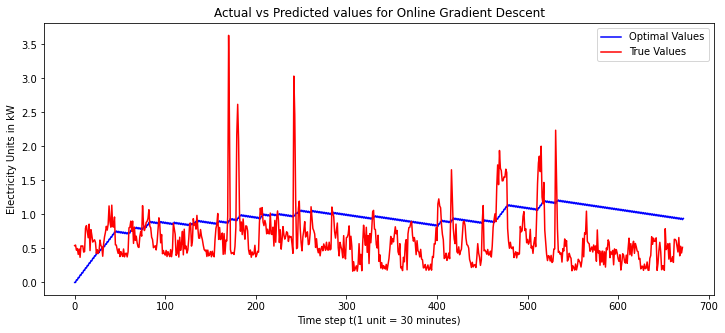

In [ ]:
plt.figure(figsize=(12, 5))
plt.title("Actual vs Predicted values for Online Gradient Descent")
plt.plot(x, 'b', label="Optimal Values")
plt.plot(home3.tolist(), 'r', label="True Values")
plt.legend()
plt.ylabel("Electricity Units in kW")
plt.xlabel("Time step t(1 unit = 30 minutes)")

**RHC, CHC with the fixed values of a and b Using Predictions from the below models**
1. LSTM. 
2. ARIMA 
In Assignment 1, the above two methods had worked best for us, so we will obtain predictions results from these.

Data **Preprocessing**

---

Since we need to use predicted values in these two algorithms, I will be using hourly predictions for Home1,2,3. The data will undergo the follwing steps:
1. Filtering out the Date Range : 1 Dec to 14 Dec
2. Resampling the data into bi-hourly buckets.

In [5]:
home3LSTM = pd.read_csv('/gdrive/MyDrive/Smart Energy/Electricity Provisioning/data/Home3LSTM.csv', sep=',', header=0, low_memory=True, infer_datetime_format=False, parse_dates={'datetime':[0]}, index_col=['datetime'])
home3LSTM = home3LSTM.resample('30T').ffill()/2
home3LSTM=home3LSTM.reset_index()
home3LSTM=home3LSTM.rename(columns={"datetime":"Date & Time"})
home3LSTM[np.logical_and(home3LSTM['Date & Time'] >= '2016-12-01', home3LSTM['Date & Time'] < '2016-12-15')]

,Date & Time,use [kW],forecast
6436,2016-12-01 00:00:00,16.707792,-34.621695
6437,2016-12-01 00:30:00,16.707792,-34.621695
6438,2016-12-01 01:00:00,15.640175,-8.944971
6439,2016-12-01 01:30:00,15.640175,-8.944971
6440,2016-12-01 02:00:00,15.810275,11.079381
...,...,...,...
7103,2016-12-14 21:30:00,27.728175,60.934143
7104,2016-12-14 22:00:00,18.787558,29.162024
7105,2016-12-14 22:30:00,18.787558,29.162024
7106,2016-12-14 23:00:00,17.413867,-34.051785


In [6]:
home3Arima = pd.read_csv('/gdrive/MyDrive/Smart Energy/Electricity Provisioning/data/Home3Arima.csv', sep=',', header=0, low_memory=True, infer_datetime_format=False, parse_dates={'datetime':[0]}, index_col=['datetime'])
home3Arima = home3Arima.resample('30T').ffill()/2
home3Arima=home3Arima.reset_index()
home3Arima=home3Arima.rename(columns={"datetime":"Date & Time"})
home3Arima[np.logical_and(home3Arima['Date & Time'] >= '2016-12-01', home3Arima['Date & Time'] < '2016-12-15')]

,Date & Time,use [kW],predicted
48,2016-12-01 00:00:00,16.707792,17.612639
49,2016-12-01 00:30:00,16.707792,17.612639
50,2016-12-01 01:00:00,15.640175,16.718345
51,2016-12-01 01:30:00,15.640175,16.718345
52,2016-12-01 02:00:00,15.810275,15.751061
...,...,...,...
715,2016-12-14 21:30:00,27.728175,23.132478
716,2016-12-14 22:00:00,18.787558,25.232255
717,2016-12-14 22:30:00,18.787558,25.232255
718,2016-12-14 23:00:00,17.413867,20.922967



**Reciding Horizon Control (RHC)**

Algorithm

In [ ]:
def RecidingHorizonControl(prediction_model, data, window_size):
  #Set values of variables
  T = 672  # 24 * 14 * 2
  a = 4 / 2
  b = 4 / 2
  p = 0.4 / 2

  length = len(data)
  
  optValues = np.zeros(T)

  for window_start in range(T):
    window = data[window_start: window_start + window_size]

    objFunction = 0

    x=cp.Variable(window_size)

    for i in range(window_size):
      if i == 0:
        objFunction += p * x[i] + (a * cp.maximum(0, window[i]-x[i])) + b * cp.abs(x[i])
      else :
        objFunction += p * x[i] + (a * cp.maximum(0, window[i]- x[i])) + b * cp.abs(x[i]-x[i-1])
    
    problem = cp.Problem(cp.Minimize(objFunction))
    result = problem.solve()
    optValues[window_start] = x.value[0]

  objFunction = 0
  for i in range(T):
      if i == 0:
          objFunction += p * optValues[i] + a * max(0, data[i] - optValues[i]) + b * abs(optValues[i]) 
      else:
          objFunction += p * optValues[i] + a * max(0, data[i] - optValues[i])+ b * abs(optValues[i] - optValues[i - 1])
  
  optimal_Values['RHC' + '_' + prediction_model] = objFunction
  decisions['RHC' + '_' + prediction_model] = optValues
  

  return objFunction

RHC with LSTM 

In [ ]:
RecidingHorizonControl('LSTM', home3LSTM['forecast'].to_list(), 7)

204695.31973133775

In [ ]:
costs = []
windows = []
for i in range(1,20):
    windows.append(i)
    costs.append(RecidingHorizonControl('LSTM', home3LSTM['forecast'].to_list(), i))

Text(0.5, 0, 'Prediction Window Size')

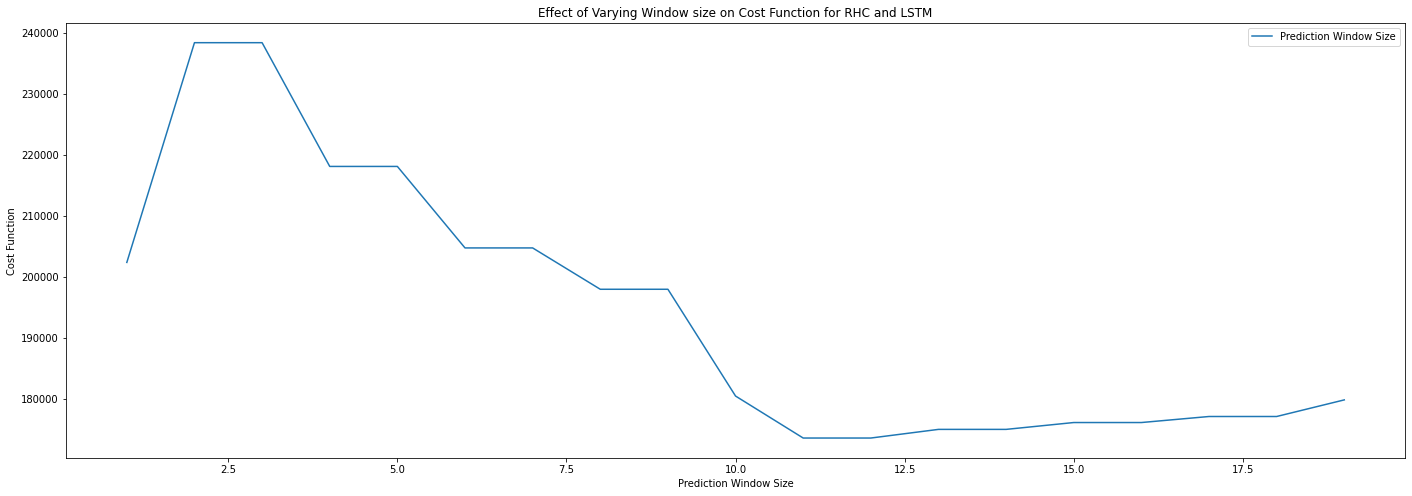

In [ ]:
fig = plt.figure(figsize=(24, 8))
plt.title("Effect of Varying Window size on Cost Function for RHC and LSTM")
plt.plot(windows, costs, label = "Prediction Window Size")
plt.legend()
plt.ylabel("Cost Function")
plt.xlabel("Prediction Window Size")

In [ ]:
print("Optimal cost for RHC and forecast is obtained when at window size is: ", windows[costs.index(min(costs))])
print("\nOptimal cost is: ", min(costs))

Optimal cost for RHC and forecast is obtained when at window size is:  12

Optimal cost is:  173528.19153144737


We see that Optimal cost for RHC and forecast is obtained when at window size is: 12

RHC with Arima

In [ ]:
RecidingHorizonControl('ARIMA', home3Arima['predicted'].to_list(), 4)

4784.587250546325

In [ ]:
costs = []
windows = []
for i in range(1,20):
    windows.append(i)
    costs.append(RecidingHorizonControl('ARIMA', home3Arima['predicted'].to_list(), i))

Text(0.5, 0, 'Prediction Window Size')

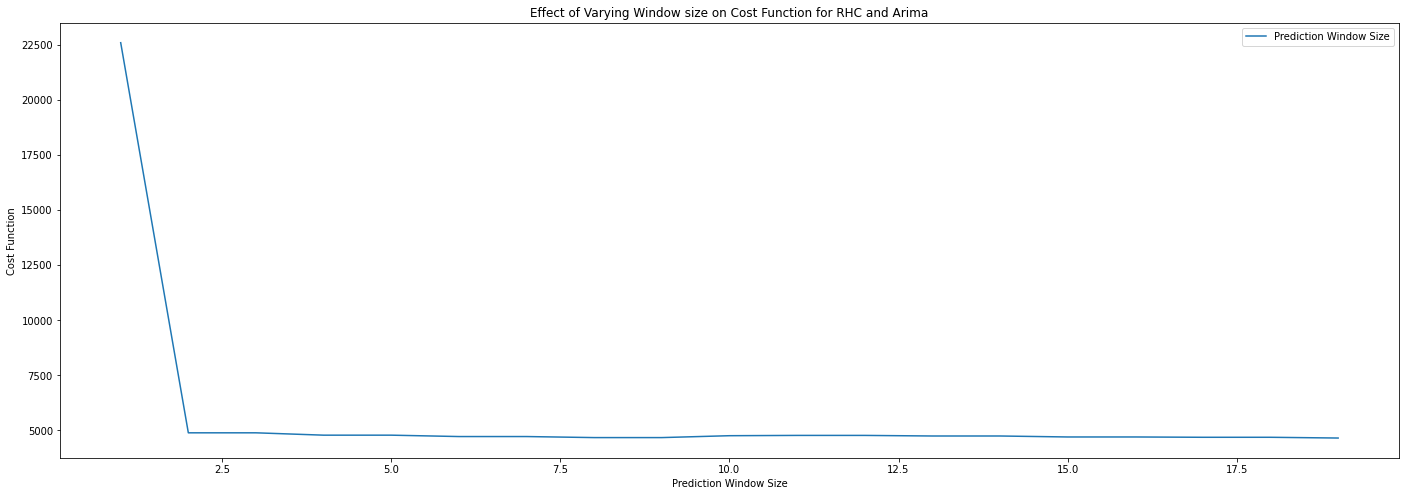

In [ ]:
fig = plt.figure(figsize=(24, 8))
plt.title("Effect of Varying Window size on Cost Function for RHC and Arima")
plt.plot(windows, costs, label = "Prediction Window Size")
plt.legend()
plt.ylabel("Cost Function")
plt.xlabel("Prediction Window Size")

In [ ]:
print("Optimal cost for RHC and forecast is obtained when at window size is: ", windows[costs.index(min(costs))])
print("\nOptimal cost is: ", min(costs))

Optimal cost for RHC and forecast is obtained when at window size is:  19

Optimal cost is:  4654.641554531059


In [ ]:
RecidingHorizonControl('ARIMA', home3Arima['predicted'].to_list(), windows[costs.index(min(costs))])

4654.641554531059

**Commitment Horizon Control (CHC)**

In [7]:

def Commitment_Horizon_Control(prediction_model, data, windowSize, commitmentLevel):
  T = 672  # 24 * 14 * 2
  p = 0.4/2
  a = 4/2
  b = 4/2
  optValues = np.zeros(T+commitmentLevel-1);
  for horizonStart in range(0, T):
    horizonEnd = horizonStart + windowSize
    windowY = data[horizonStart: horizonEnd]
    
    objective_function = 0
    x = cp.Variable(windowSize)
    
    for i in range(0, windowSize):
        if i == 0:
            objective_function += p * x[i] + a * cp.maximum(0, windowY[i] - x[i]) + b * cp.abs(x[i])
        else:
            objective_function += p * x[i] + a * cp.maximum(0, windowY[i] - x[i]) + b * cp.abs(x[i] - x[i - 1])
    
    objective = cp.Minimize(objective_function)
    problem = cp.Problem(objective)
    result = problem.solve()
    
    for i in range(0, commitmentLevel):
      optValues[horizonStart + i] += x.value[i]

  optValues = optValues/commitmentLevel

  objective_function = 0
  for i in range(0, T):
      if i == 0:
          objective_function += p * optValues[i] + a * max(0, data[i] - optValues[i]) + b * abs(optValues[i])
      else:
          objective_function += p * optValues[i] + a * max(0, data[i] - optValues[i]) + b * abs(optValues[i] - optValues[i - 1])

  optimal_Values['CHC' + '_' + prediction_model] = objective_function
  decisions['CHC' + '_' + prediction_model] = optValues

  return objective_function

CHC with LSTM

In [ ]:
Commitment_Horizon_Control('LSTM', home3LSTM['forecast'].to_list(), 8, 2)

186604.37696889933

In [ ]:
costs = []
windows = []
for i in range(1,21):
    windows.append(i)
    costs.append(Commitment_Horizon_Control('LSTM', home3LSTM['forecast'].to_list(), 20, i))

Text(0.5, 0, 'Commitment Level Size')

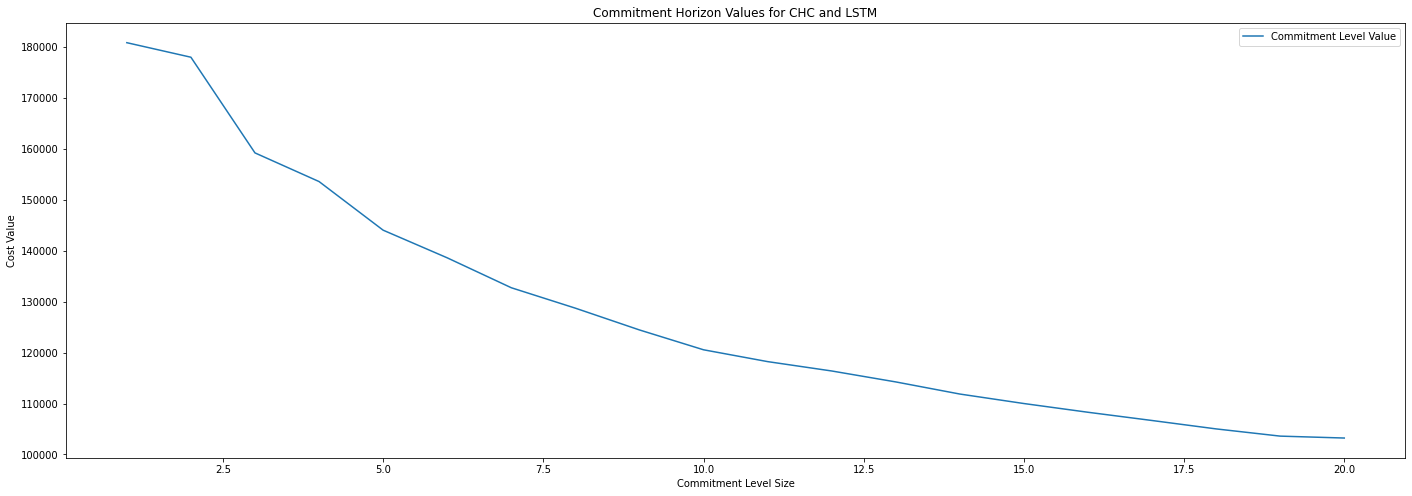

In [ ]:
fig = plt.figure(figsize=(24, 8))
plt.title("Commitment Horizon Values for CHC and LSTM")
plt.plot(windows, costs, label = "Commitment Level Value")
plt.legend()
plt.ylabel("Cost Value")
plt.xlabel("Commitment Level Size")

In [ ]:
print("Optimal cost for CHC found at commitment horizon size: ", windows[costs.index(min(costs))])
print("\nOptimal cost is: ", min(costs))

Optimal cost for CHC found at commitment horizon size:  20

Optimal cost is:  103220.1691037136


In [ ]:
Commitment_Horizon_Control('LSTM', home3LSTM['forecast'].to_list(), 20, windows[costs.index(min(costs))])

103220.1691037136

CHC with ARIMA

In [ ]:
Commitment_Horizon_Control('ARIMA', home3Arima['predicted'].to_list(), 8, 2)

4402.050568304061

In [8]:
costs = []
windows = []
for i in range(1,21):
    windows.append(i)
    costs.append(Commitment_Horizon_Control('ARIMA', home3Arima['predicted'].to_list(), 20, i))

Text(0.5, 0, 'Commitment Level Size')

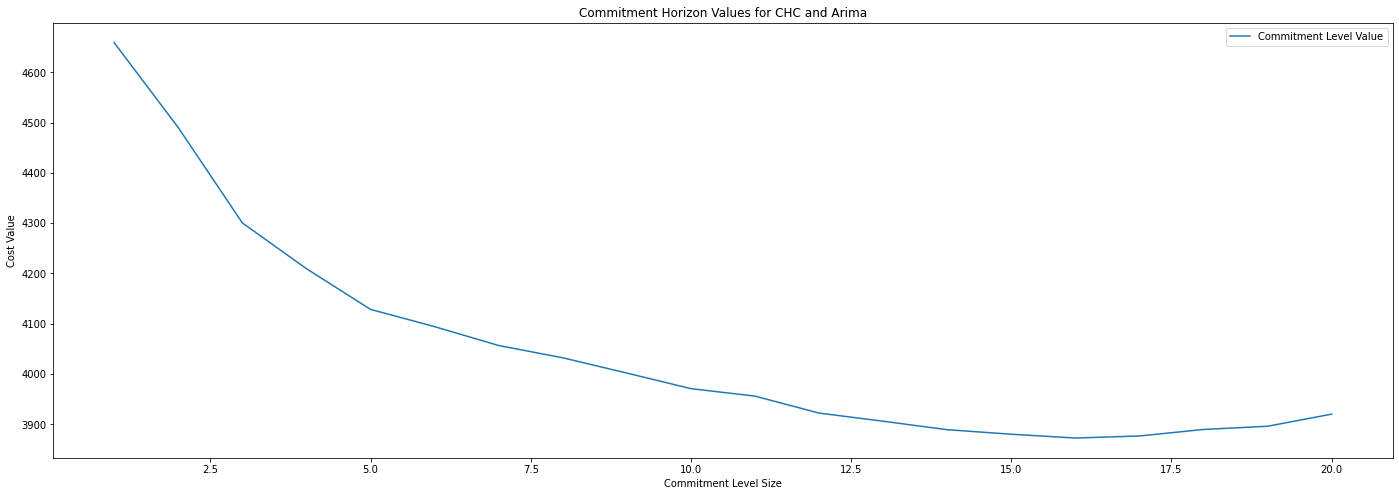

In [9]:
fig = plt.figure(figsize=(24, 8))
plt.title("Commitment Horizon Values for CHC and Arima")
plt.plot(windows, costs, label = "Commitment Level Value")
plt.legend()
plt.ylabel("Cost Value")
plt.xlabel("Commitment Level Size")

In [13]:
print("Optimal cost for CHC found at commitment horizon size: ", windows[costs.index(min(costs))])
print("\nOptimal cost is: ", min(costs))

Optimal cost for CHC found at commitment horizon size:  16

Optimal cost is:  3872.7641361753535


In [11]:
Commitment_Horizon_Control('ARIMA', home3Arima['predicted'].to_list(), 20, windows[costs.index(min(costs))])

3872.7641361753535

For the best combination of control algorithm: CHC and prediction algorithm : LSTM, vary a and b to see the impacts.

In [12]:
def chc_vary_a_and_b(y, predictionHorizon, commitmentHorizon, prediction_algo, a, b):
  T = 2*24*14;
  p = 0.4/2;
  a = a/2;
  b = b/2;
  optValues = np.zeros(T + 20);
  for horizonStart in range(0, T):
    horizonEnd = horizonStart + predictionHorizon
    windowY = y[horizonStart: horizonEnd]
    
    obj = 0;
    x = cp.Variable(predictionHorizon)
    
    for i in range(0, predictionHorizon):
        obj += p * x[i] + a * cp.maximum(0, windowY[i] - x[i])
        if i == 0:
            obj += b * cp.abs(x[i]); #because x(0) is 0
        else:
            obj += b * cp.abs(x[i] - x[i - 1])
    
    objective = cp.Minimize(obj)
    problem = cp.Problem(objective)
    result = problem.solve()
    
    for i in range(0, commitmentHorizon):
      optValues[horizonStart + i] += x.value[i];

  optValues = optValues/commitmentHorizon

  obj = 0;
  for i in range(0, T):
      obj += p * optValues[i] + a * max(0, y[i] - optValues[i])
      if i == 0:
          obj += b * abs(optValues[i]); #because x(0) is 0
      else:
          obj += b * abs(optValues[i] - optValues[i - 1])

  return obj


In [14]:
costs = []
windows = []
for i in range(1,11):
    windows.append(i)
    costs.append(chc_vary_a_and_b(home3LSTM['forecast'].to_list(), 21, 20, 'LSTM', i, 4))

Text(0.5, 0, 'a')

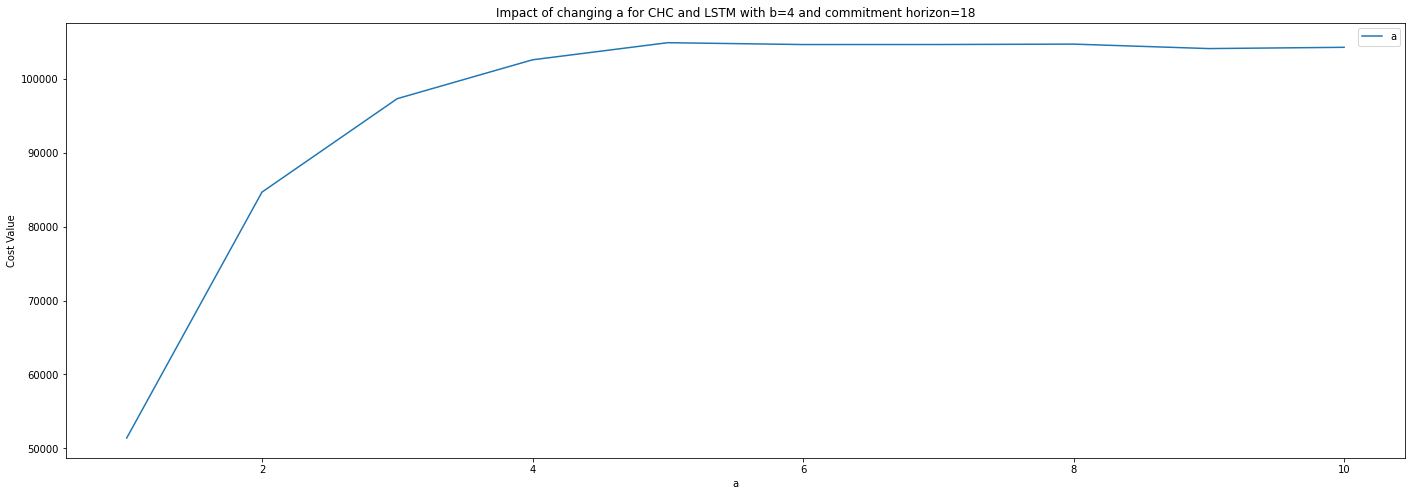

In [15]:
fig = plt.figure(figsize=(24, 8))
plt.title("Impact of changing a for CHC and LSTM with b=4 and commitment horizon=20")
plt.plot(windows, costs, label = "a")
plt.legend()
plt.ylabel("Cost Value")
plt.xlabel("a")

In [16]:
costs = []
windows = []
for i in range(1,11):
    windows.append(i)
    costs.append(chc_vary_a_and_b(home3LSTM['forecast'].to_list(), 21, 20, 'LSTM', 4, i))

Text(0.5, 0, 'b')

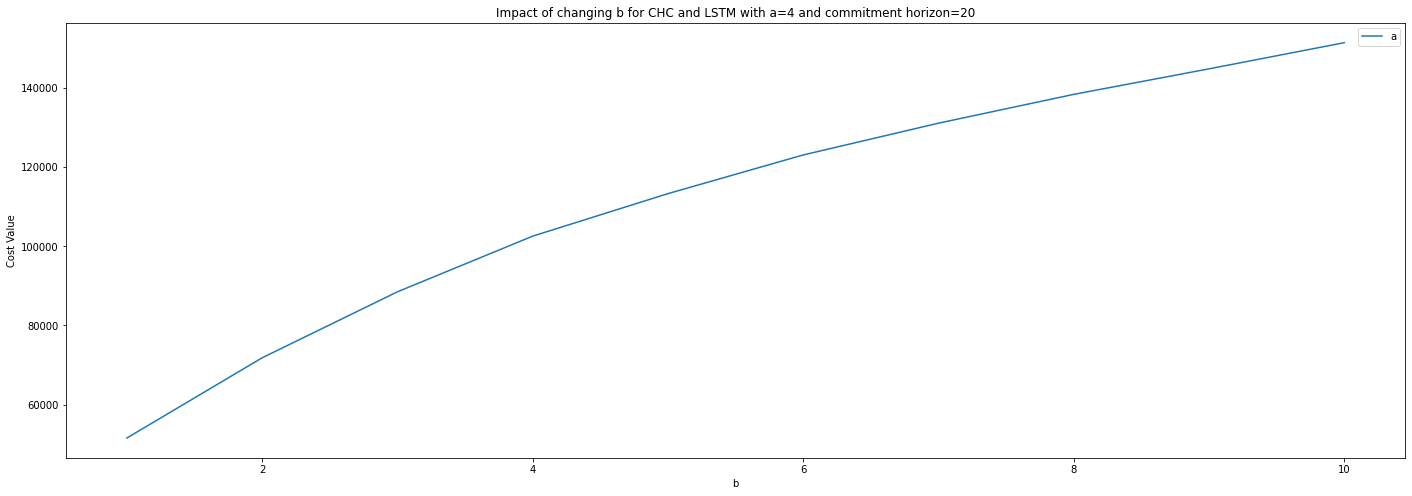

In [17]:
fig = plt.figure(figsize=(24, 8))
plt.title("Impact of changing b for CHC and LSTM with a=4 and commitment horizon=20")
plt.plot(windows, costs, label = "a")
plt.legend()
plt.ylabel("Cost Value")
plt.xlabel("b")

**Comparison of OGD, CHC, RHC with Static Offline and Dynamic Offline Algorithms**

Comparision of the objective function values for Offline Static and Dynamic, OGD, RHC with ARIMA and LSTM, CHC with ARIMA and LSTM. 

In [ ]:
import seaborn as sb
sb.set_style("white")
fig = plt.figure(figsize=(24, 8))

ax = sb.pointplot(x=list(optimal_Values.keys()), y=[score for score in optimal_Values.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(optimal_Values.values()):
    ax.text(i, score + 0.002, '{:.6f}'.format(score), horizontalalignment='right', size='large', color='black', weight='semibold')
plt.title('Optimal Cost of Algorithms', size=16, color='darkblue')
plt.ylabel('Cost for objective function', size=16, labelpad=12.5, color='darkblue')
plt.xlabel('Provisioning Algorithm', size=16, labelpad=12.5, color='darkblue')
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)


plt.show()

Comparison of the decision values for Offline Static and Dynamic, OGD, RHC with ARIMA and LSTM, CHC with ARIMA and LSTM.

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(24, 8))
plt.title("Decision values for Provisioning Algorithms")
plt.plot(home3.tolist(), 'r', label="Usage [kw]")
plt.plot(decisions['Offline_Static'], 'g', label="Offline Static Provisioning")
plt.plot(decisions['Offline_Dynamic'], 'b', label="Offline Dynamic Provisioning")
plt.plot(decisions['OGD'], 'y', label="OGD")
plt.plot(decisions['RHC_LSTM'], 'c', label="RHC with LSTM")
plt.plot(decisions['RHC_ARIMA'], 'm', label="RHC with ARIMA")
plt.plot(decisions['CHC_LSTM'], 'k', label="CHC with LSTM")
plt.plot(decisions['CHC_ARIMA'], 'w', label="CHC with ARIMA")
plt.legend()
plt.ylabel("Electricity Units in kW")
plt.xlabel("Time step t(1 unit = 30 minutes)")


Comparison of OGD, CHC, RHC with Static Offline and Dynamic Offline Algorithms by calculating regret factor